# Preprcoessing Test Data Set (Unknown Data) and Testing ML Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import joblib

In [2]:
test_data = pd.read_csv("Attrition_Test_Set.csv")
test_data.shape

(2630, 21)

In [3]:
test_data.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,...,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,...,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,...,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,...,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,...,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

#### There are missing values in some variables.

In [5]:
test_data.rename(columns={"HourlnWeek":"HourInWeek"},inplace=True)

## Data Summary and Descriptive Statistics

In [6]:
data1=test_data.drop(["EmployeeID","ESOPs","OverTime"],axis=1)

#Dropping these columns before checking descriptive statistics of the DataFrame as they are either irrelavant/target variable/have binary values only.

In [7]:
data1.describe()

,Age,HomeToWork,HourInWeek,Involvement,WorkLifeBalance,JobSatisfaction,NumCompaniesWorked,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MonthlyIncome
count,2488.000000,2504.000000,2494.000000,2630.000000,2630.000000,2630.000000,2630.000000,2536.000000,2508.000000,2573.000000,2496.000000,2597.000000
mean,37.425643,11.428115,57.863272,3.239544,3.069202,3.115589,3.222814,20.636830,11.525518,2.661096,4.506811,21824.038891
std,9.357662,8.848326,13.234507,0.884138,1.416552,1.337760,2.663692,3.725519,8.125348,3.303497,3.585424,5092.623158
min,18.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,16.000000,0.000000,0.000000,0.000000,1000.000000
25%,31.000000,5.000000,49.000000,3.000000,2.000000,2.000000,1.000000,18.000000,6.000000,1.000000,2.000000,18407.000000
50%,36.000000,9.000000,59.000000,3.000000,3.000000,3.000000,2.000000,19.000000,10.000000,1.000000,3.000000,20332.000000
75%,44.000000,17.000000,67.000000,4.000000,4.000000,4.000000,5.000000,23.000000,16.000000,3.000000,8.000000,23587.000000
max,61.000000,123.000000,110.000000,5.000000,5.000000,5.000000,20.000000,31.000000,41.000000,16.000000,18.000000,96000.000000


#### Some notable observations are:
1. Average age of employees ~37.
2. Average distance between home and office is 11 KM and most of them travel <=17 KM.
3. Average job satisfaction score ~3.
4. Number of companies employees worked on an average is 3. Most of them worked for <=5 companies.
5. They have 11 years of average work experience and most of them have 10-15 years of work experience.
6. On an average employees are working in the current company since 4+ years. Most of them working since <=8 years.
7. Average monthly income of employees ~21,800 and it's close to ~23,600 for most of the employees.


In [8]:
ignore_columns = ["EmployeeID","Age","HourInWeek","HomeToWork","MonthlyIncome"]

#for value_counts

In [9]:
for i in test_data.columns:
    if i not in ignore_columns:
        print(round(test_data[i].value_counts(normalize=True),2),"\n")

TravelProfile
Rarely    0.70
Yes       0.20
No        0.09
Name: proportion, dtype: float64 

Department
Analytics    0.65
Sales        0.31
Marketing    0.04
Name: proportion, dtype: float64 

EducationField
Statistics           0.40
CA                   0.33
Marketing Diploma    0.11
Engineer             0.10
Other                0.06
MBA                  0.01
Name: proportion, dtype: float64 

Gender
Male      0.61
Female    0.26
F         0.13
Name: proportion, dtype: float64 

Involvement
3    0.57
4    0.27
1    0.07
5    0.07
2    0.02
Name: proportion, dtype: float64 

WorkLifeBalance
4    0.22
5    0.21
3    0.19
1    0.19
2    0.19
Name: proportion, dtype: float64 

Designation
Executive         0.38
Manager           0.35
Senior Manager    0.15
AVP               0.07
VP                0.04
Name: proportion, dtype: float64 

JobSatisfaction
3    0.31
5    0.20
4    0.19
1    0.17
2    0.13
Name: proportion, dtype: float64 

ESOPs
1    0.5
0    0.5
Name: proportion, dtype: flo

#### Observations:
1. 65% of the given employees are from Analytics department, 31% are from Sales and rest are from Marketing department.
2. Around 70% employees should travel for work rarely, 20% employees have to travel regularly and rest need not travel at all.
3. 61% employees are men and rest are women.
4. Engagement activity conducted is not helping more than half of the employees as they have given the score as 3 (neutral) or <3.
5. 21% employees are highly satisifed with work-life balance, 22% are just satisfied, 19% are neutral and the rest are unsatisfied/highly disatisfied.
6. Around 38% employees are executives, 50% are either managers (35%)/senior managers and the rest are AVPs/VPs.
7. Job satisfied employees are around 39%, 31% are neutral and the rest are not satisifed with their job.
8. Around 43% have worked in 1 or 2 companies before joining their present company. Less than 30% employees have worked in more than 5 companies.
9. More than 80% employees have 5+ years of work experience, 45% employees have 10+ years of work experience.

## Inconsistencies and Duplicates

In [10]:
#Correcting inconsistencies

test_data["Gender"]=test_data["Gender"].replace("F","Female")
test_data["MaritalStatus"]=test_data["MaritalStatus"].replace("M","Married")
test_data["MaritalStatus"]=test_data["MaritalStatus"].replace("Divorsed","Divorced")

In [11]:
test_data.describe(include=object)

,TravelProfile,Department,EducationField,Gender,Designation,MaritalStatus
count,2630,2572,2630,2600,2600,2630
unique,3,3,6,2,5,3
top,Rarely,Analytics,Statistics,Male,Executive,Married
freq,1852,1675,1040,1574,993,1220


#### There are more male employees than female. 46% of the given employees are married. Around 38% are in executive level.

In [12]:
test_data.duplicated().sum()

np.int64(0)

## Missing Values identification

In [13]:
data2=test_data.drop("EmployeeID",axis=1)

In [14]:
data2.Age = data2.Age.astype('Int64')

list1 = ['TravelProfile', 'Department', 'EducationField', 'Gender', 'Involvement', 'WorkLifeBalance', 'Designation',
        'JobSatisfaction', 'MaritalStatus']
for i in list1:
    data2[i] = data2[i].astype('category')

In [15]:
data2.isnull().sum()

Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourInWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [16]:
numerical = []
categorical = []
for col in data2.select_dtypes(exclude=['object','category']).columns:
    numerical.append(col)
for col1 in data2.select_dtypes(include=['object','category']).columns:
    categorical.append(col1)

## Univariate Analysis

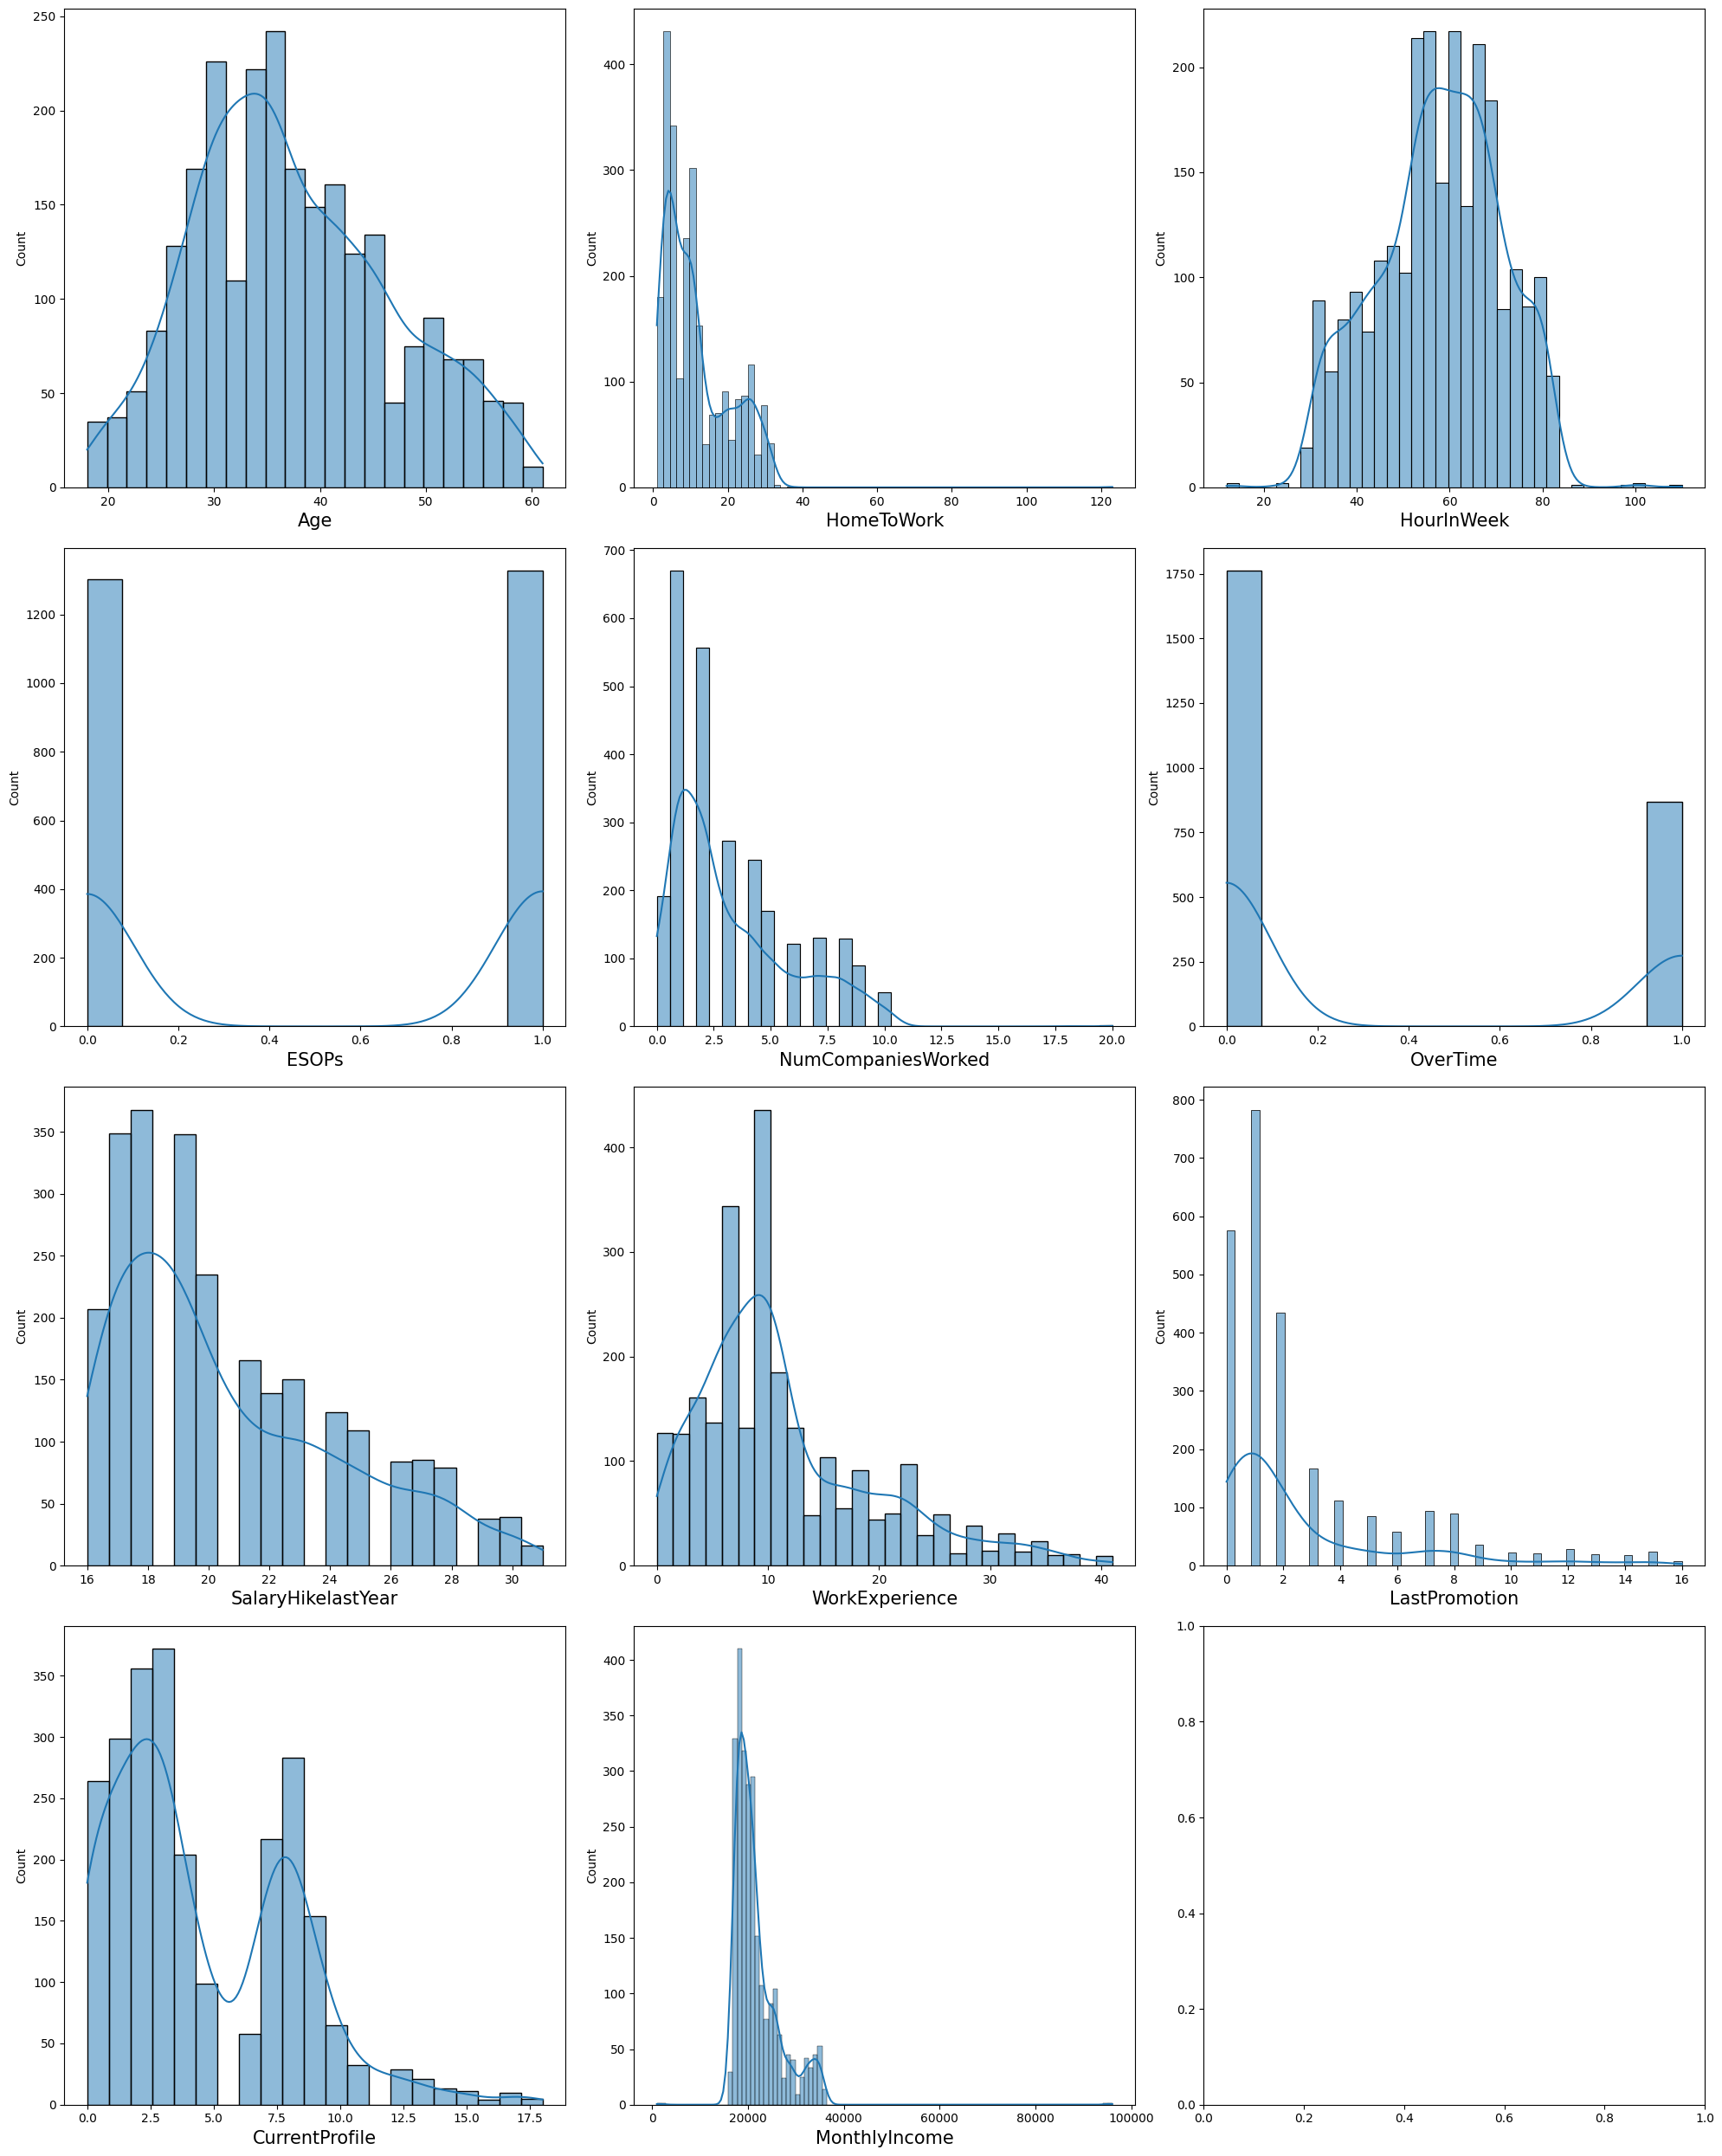

In [17]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,25))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.histplot(data=data2, x=col, kde=True, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=15)
fig.tight_layout()
plt.show()

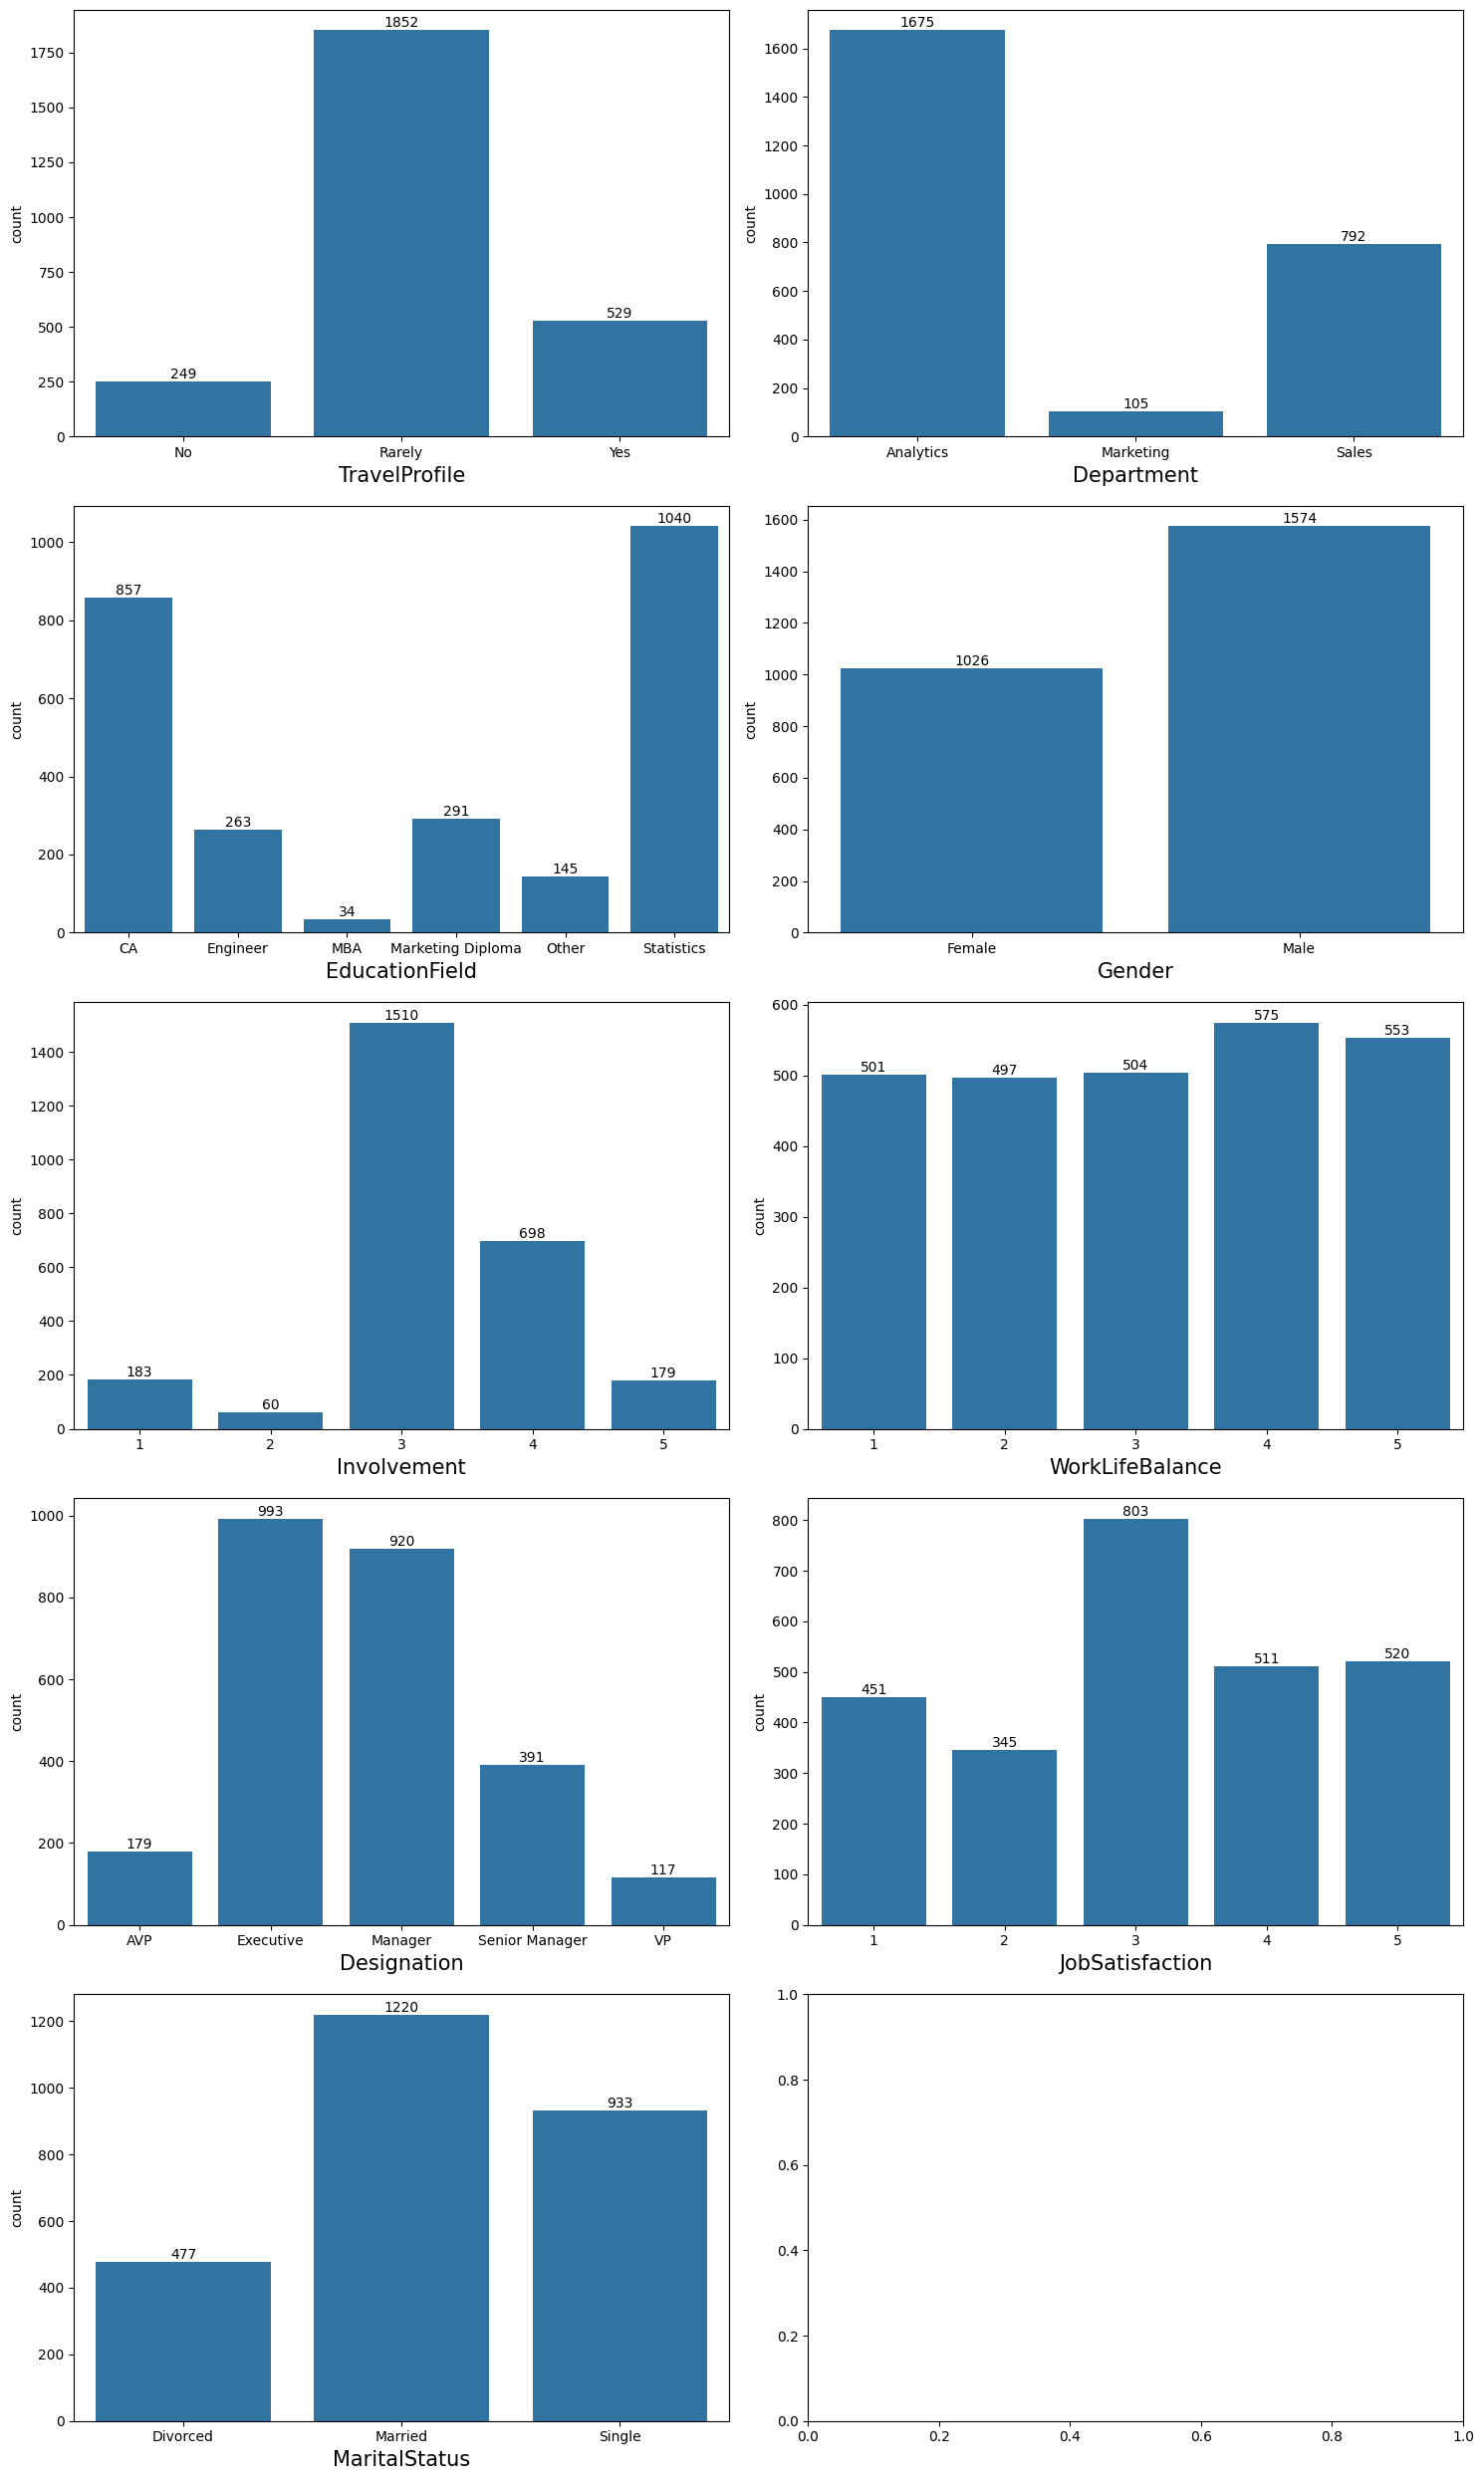

In [18]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,25))
axs = axs.flatten()

for i, col in enumerate(categorical):
    ax=axs[i]
    sns.countplot(data=data2, x=col, ax=ax)
    ax.set_xlabel(col, fontsize=15)
    fig.tight_layout()

    for container in ax.containers:
        ax.bar_label(container)
        
plt.show()

In [19]:
data2.dtypes

Age                      Int64
TravelProfile         category
Department            category
HomeToWork             float64
EducationField        category
Gender                category
HourInWeek             float64
Involvement           category
WorkLifeBalance       category
Designation           category
JobSatisfaction       category
ESOPs                    int64
NumCompaniesWorked       int64
OverTime                 int64
SalaryHikelastYear     float64
WorkExperience         float64
LastPromotion          float64
CurrentProfile         float64
MaritalStatus         category
MonthlyIncome          float64
dtype: object

## Correlation Analysis

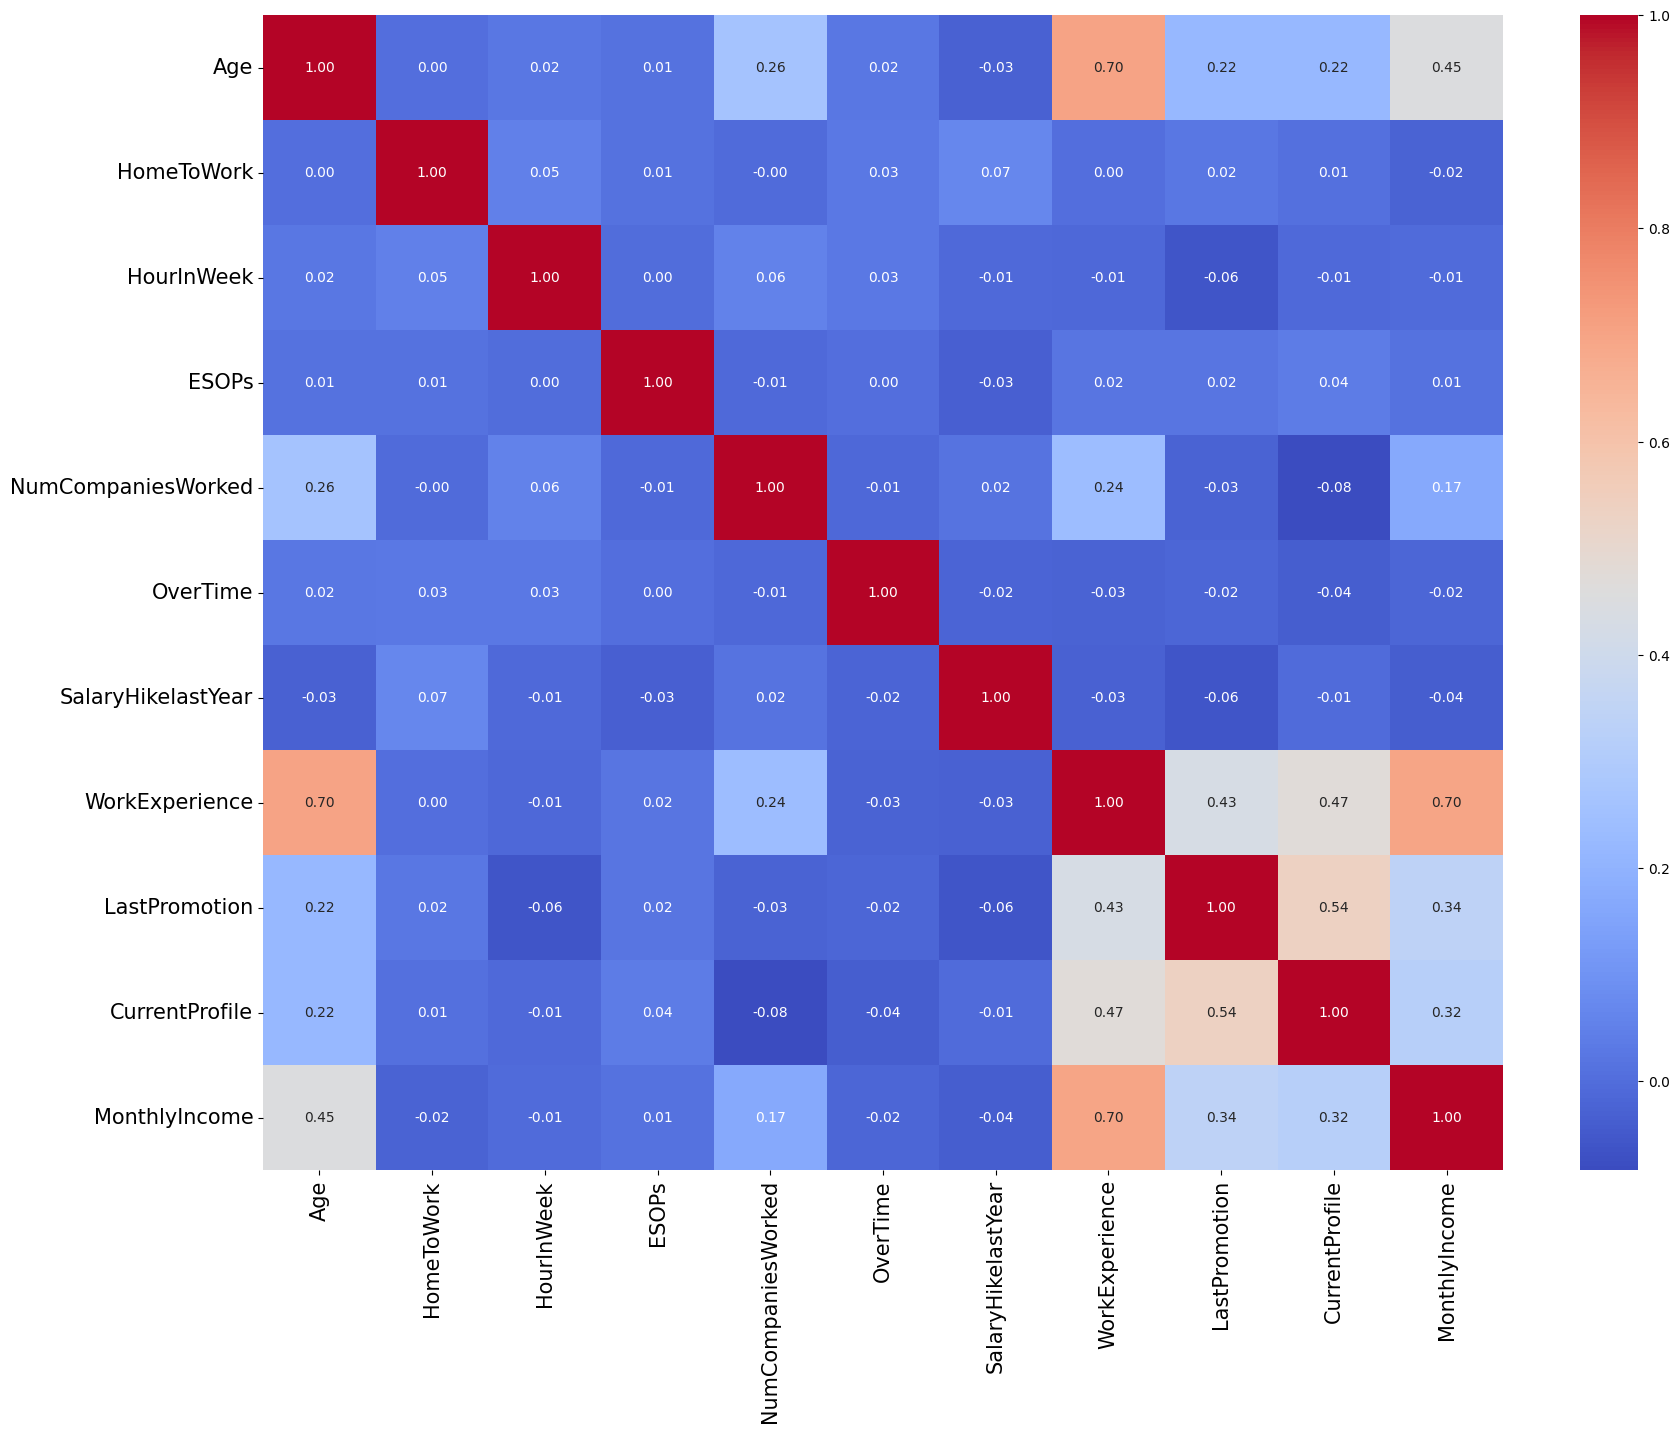

In [20]:
plt.figure(figsize=(20,15))
corr = data2.corr(numeric_only=True)
sns.heatmap(corr,cmap="coolwarm",annot=True,fmt=".2f")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

### Observations:

1. Age and Work Experience are highly correlated.
2. Monthly Income and Work Experience are also highly correlated.
3. Last Promotion and Current Profile are moderately correlated with each other.
4. Age and Monthly Income are moderately correlated.

In [21]:
data2.dtypes

Age                      Int64
TravelProfile         category
Department            category
HomeToWork             float64
EducationField        category
Gender                category
HourInWeek             float64
Involvement           category
WorkLifeBalance       category
Designation           category
JobSatisfaction       category
ESOPs                    int64
NumCompaniesWorked       int64
OverTime                 int64
SalaryHikelastYear     float64
WorkExperience         float64
LastPromotion          float64
CurrentProfile         float64
MaritalStatus         category
MonthlyIncome          float64
dtype: object

## Missing values Imputation

In [22]:
#Using mode method to fill missing values for object variables.

data2["Department"]=data2["Department"].fillna(data2["Department"].mode()[0])
data2["Gender"]=data2["Gender"].fillna(data2["Gender"].mode()[0])
data2["Designation"]=data2["Designation"].fillna(data2["Designation"].mode()[0])

In [23]:
#Using median method to fill missing values for numerical variables since the data is skewed.

cols = ["Age", "HomeToWork", "HourInWeek", "SalaryHikelastYear", "WorkExperience", "LastPromotion", "CurrentProfile", "MonthlyIncome"]

for col in cols:
    data2[col].fillna(data2[col].median(), inplace=True)

In [24]:
data2.isnull().sum()

Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourInWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

## Outlier Detection

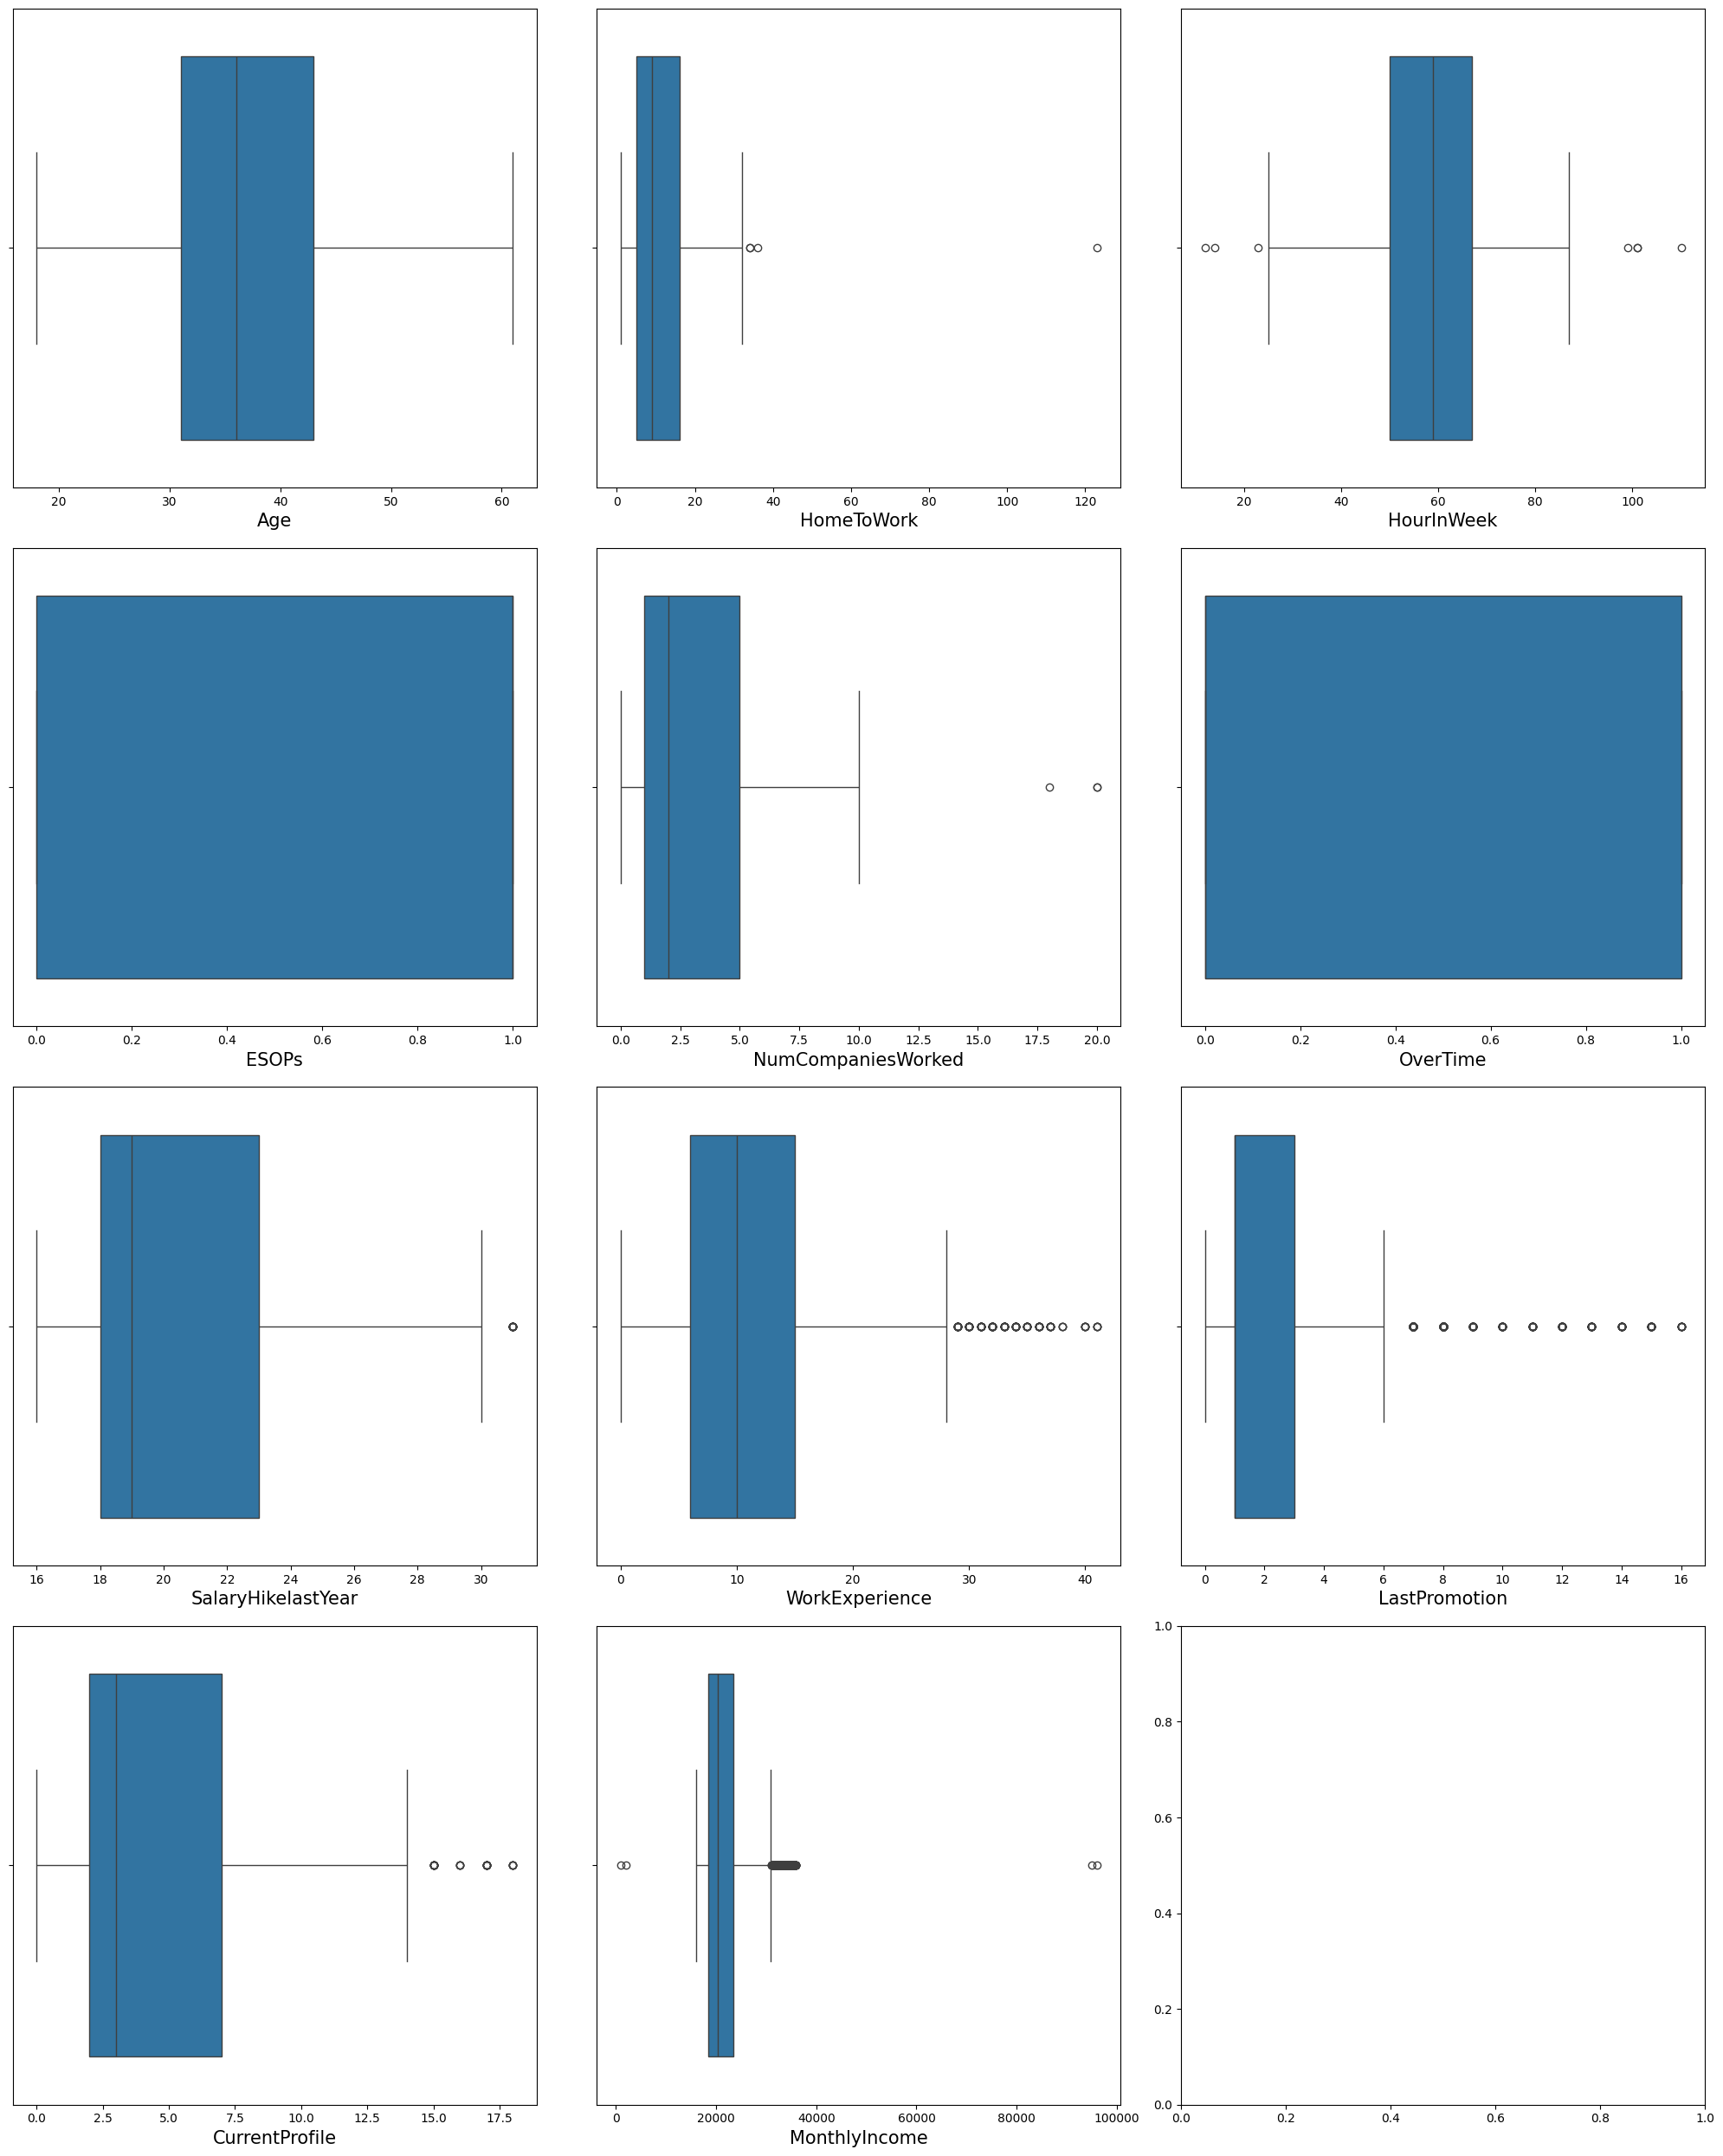

In [25]:
#Visualizing distributions and identifing outliers

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,25))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data=data2, x=col, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=15)
fig.tight_layout()
plt.show()

In [26]:
#outliers detection

def outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_values = col[(col < lower_bound) | (col > upper_bound)]
    outlier_proportion = round((len(outlier_values) / col.count())*100, 2)
    return outlier_proportion

In [27]:
for col in numerical:
    print("Outlier Proportion of {}:".format(col),outliers(data2[col]))

Outlier Proportion of Age: 0.0
Outlier Proportion of HomeToWork: 0.15
Outlier Proportion of HourInWeek: 0.27
Outlier Proportion of ESOPs: 0.0
Outlier Proportion of NumCompaniesWorked: 0.11
Outlier Proportion of OverTime: 0.0
Outlier Proportion of SalaryHikelastYear: 0.61
Outlier Proportion of WorkExperience: 4.9
Outlier Proportion of LastPromotion: 13.69
Outlier Proportion of CurrentProfile: 1.14
Outlier Proportion of MonthlyIncome: 8.1


### Observations:

Note: 
1. 0% to 5%: Very few outliers — usually safe to ignore or cap if needed.
2. 5% to 10%: Moderate outliers — investigate, consider capping or transforming.
3. More than 10%: High outliers — deep analysis needed to determine if values are valid, require transformation, or if the feature needs revision

#### Variables WorkExperience and MonthlyIncome can be capped as the outlier proportion is moderate.
#### Variable LastPromotion can be log transformed as these are crucial values and does not make sense to cap them

## Handling Outliers

In [28]:
#Capping outliers

columns_to_cap = ['WorkExperience', 'MonthlyIncome']

def cap_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col.apply(lambda y: upper_bound if y > upper_bound else y).apply(lambda y: lower_bound if y < lower_bound else y)

In [29]:
for col in columns_to_cap:
    data2[col]=cap_outliers(data2[col])

In [30]:
#log transforming outliers

columns_to_log = ['LastPromotion']

for col in columns_to_log:
    data2[f'{col}_log']=np.log1p(data2[col])

In [31]:
data2=data2.drop("LastPromotion",axis=1)

In [32]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 2630 non-null   Int64   
 1   TravelProfile       2630 non-null   category
 2   Department          2630 non-null   category
 3   HomeToWork          2630 non-null   float64 
 4   EducationField      2630 non-null   category
 5   Gender              2630 non-null   category
 6   HourInWeek          2630 non-null   float64 
 7   Involvement         2630 non-null   category
 8   WorkLifeBalance     2630 non-null   category
 9   Designation         2630 non-null   category
 10  JobSatisfaction     2630 non-null   category
 11  ESOPs               2630 non-null   int64   
 12  NumCompaniesWorked  2630 non-null   int64   
 13  OverTime            2630 non-null   int64   
 14  SalaryHikelastYear  2630 non-null   float64 
 15  WorkExperience      2630 non-null   fl

In [33]:
numerical = []
categorical = []
for col in data2.select_dtypes(exclude=['object','category']).columns:
    numerical.append(col)
for col1 in data2.select_dtypes(include=['object','category']).columns:
    categorical.append(col1)

In [34]:
for col in numerical:
    print("Outlier Proportion of {}:".format(col),outliers(data2[col]))

Outlier Proportion of Age: 0.0
Outlier Proportion of HomeToWork: 0.15
Outlier Proportion of HourInWeek: 0.27
Outlier Proportion of ESOPs: 0.0
Outlier Proportion of NumCompaniesWorked: 0.11
Outlier Proportion of OverTime: 0.0
Outlier Proportion of SalaryHikelastYear: 0.61
Outlier Proportion of WorkExperience: 0.0
Outlier Proportion of CurrentProfile: 1.14
Outlier Proportion of MonthlyIncome: 0.0
Outlier Proportion of LastPromotion_log: 4.49


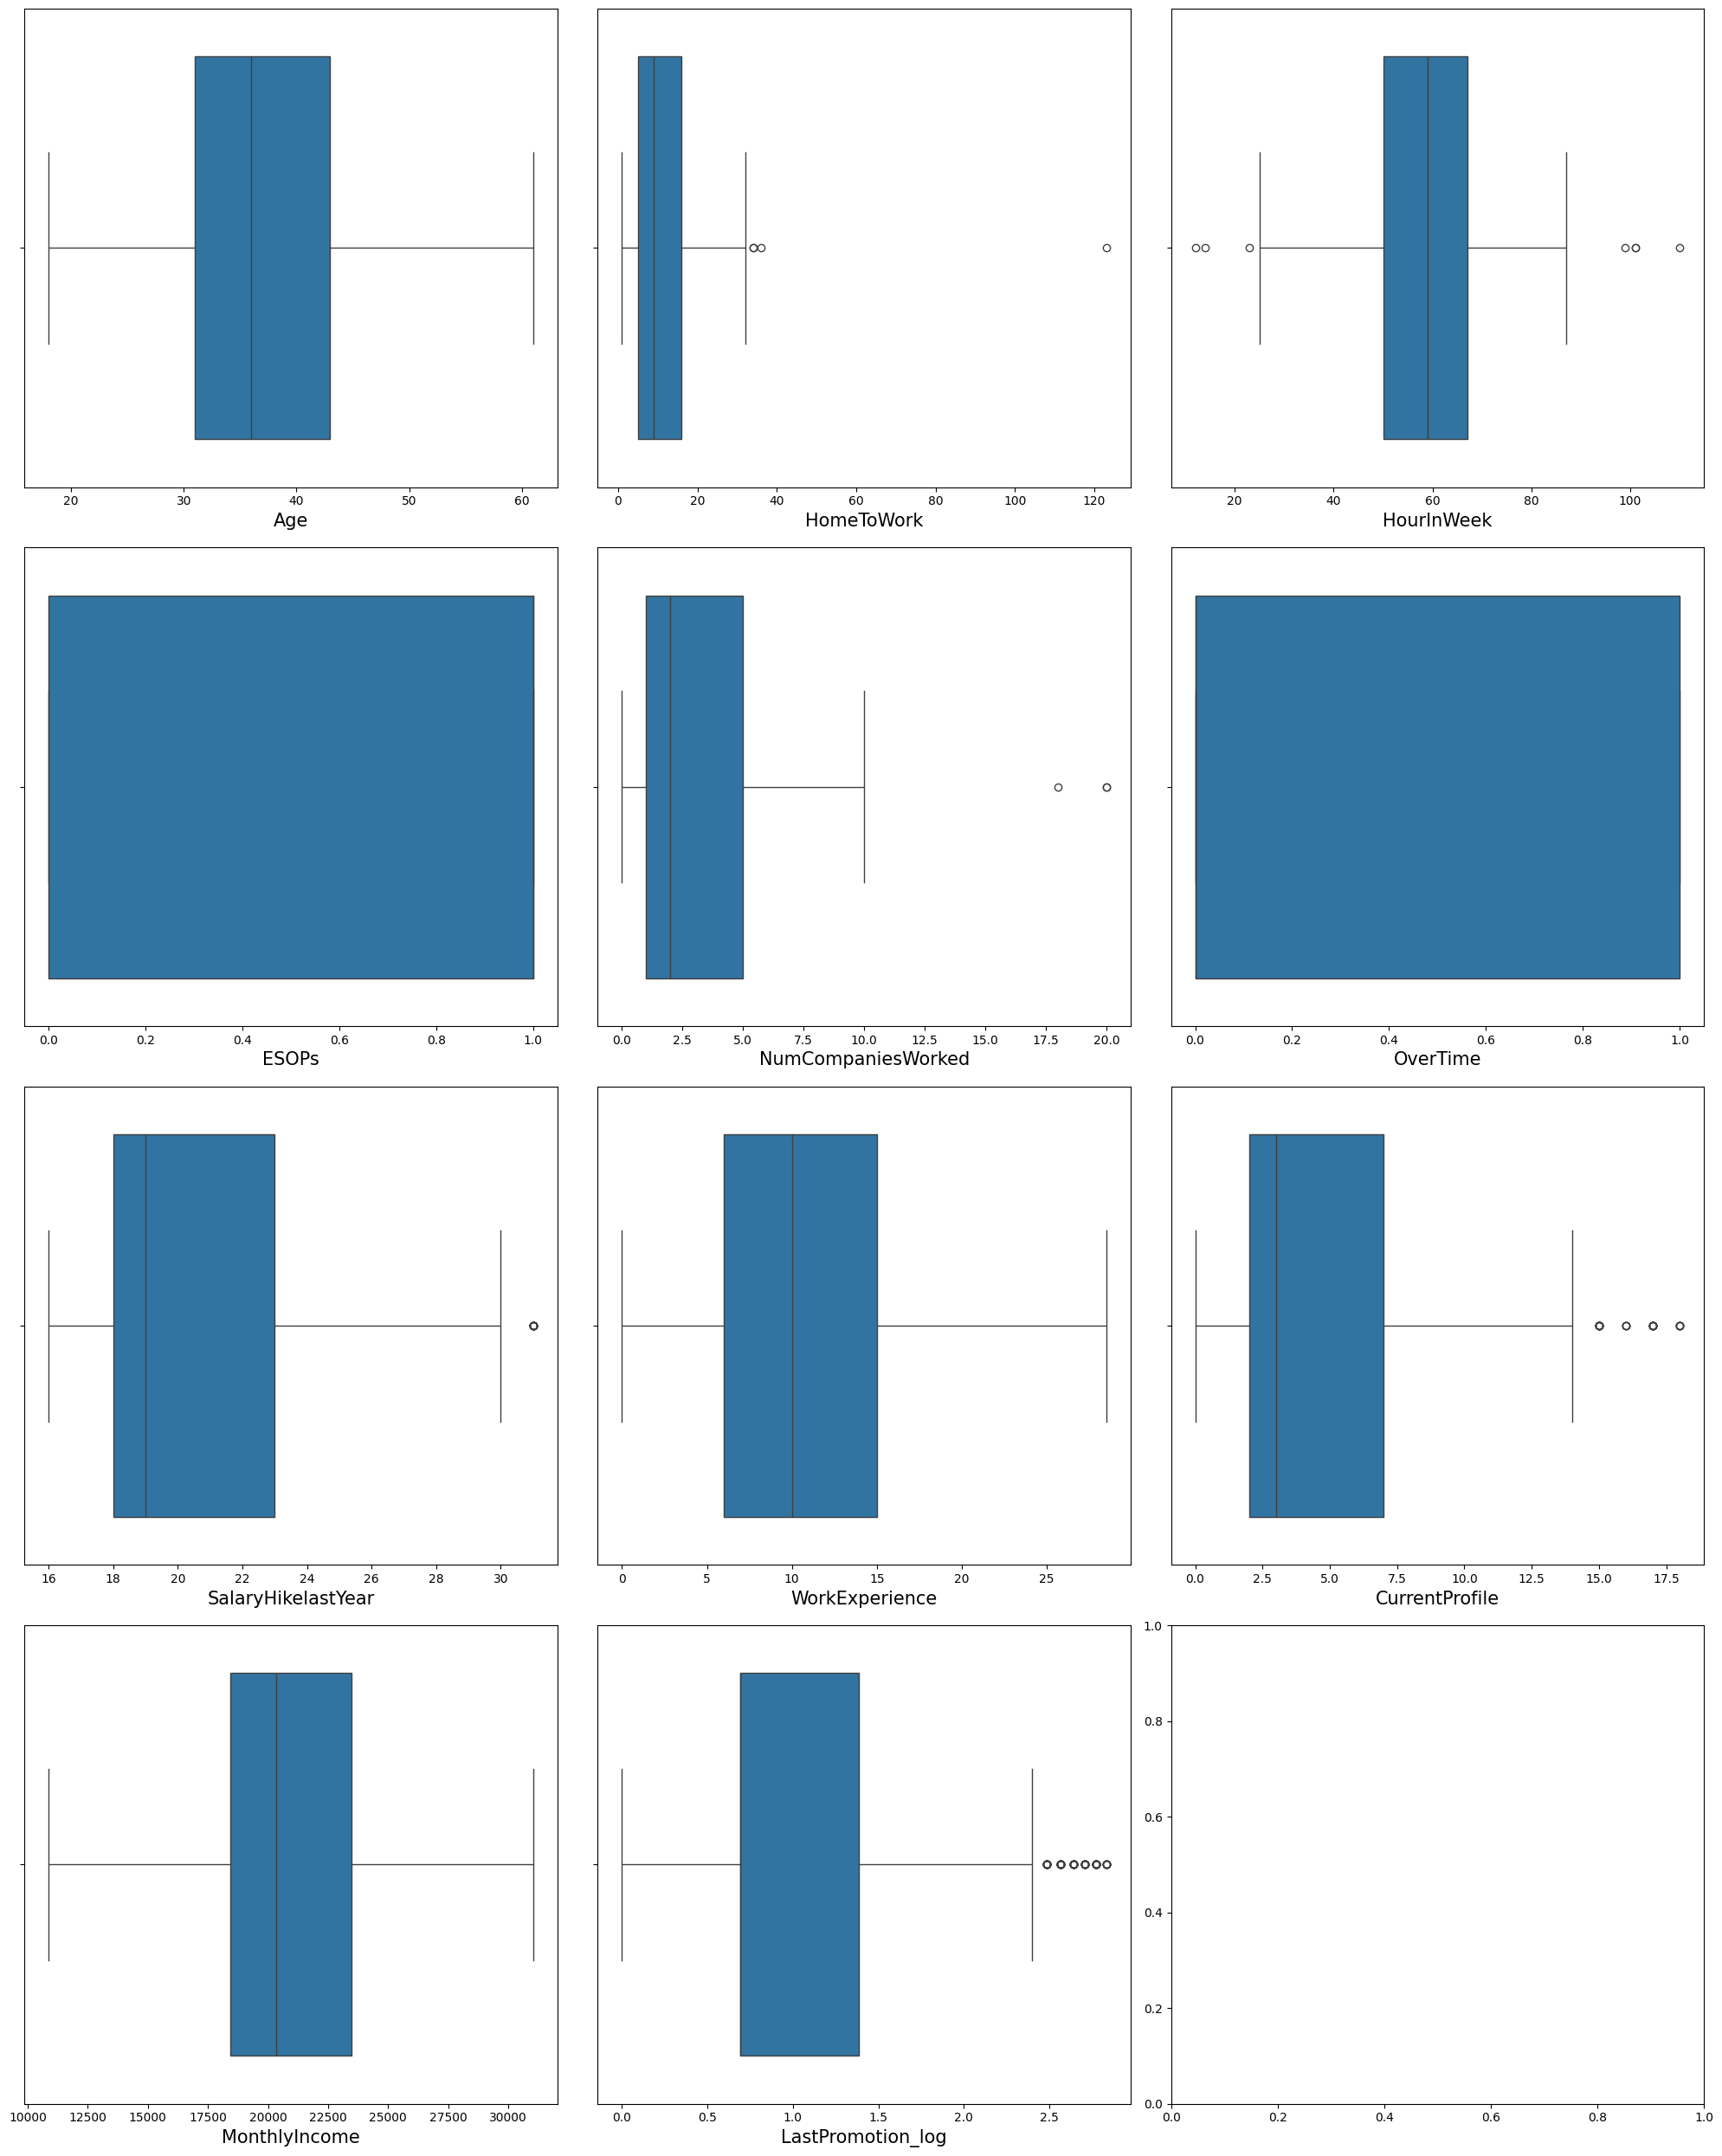

In [35]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20,25))
axs = axs.flatten()

for i, col in enumerate(numerical):
    sns.boxplot(data=data2, x=col, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=15)
fig.tight_layout()
plt.show()

In [36]:
#Checking skewness for numeric columns
skewness = data2.select_dtypes(exclude=['object', 'category']).skew().sort_values(ascending=False)
print(skewness)

HomeToWork            1.608691
NumCompaniesWorked     1.11986
MonthlyIncome         1.078666
SalaryHikelastYear    0.881884
CurrentProfile        0.871823
WorkExperience        0.864083
OverTime              0.723307
LastPromotion_log     0.503474
Age                    0.39653
ESOPs                -0.019784
HourInWeek           -0.198238
dtype: Float64


In [37]:
columns_to_log_2 = ['NumCompaniesWorked', 'HomeToWork', 'WorkExperience','MonthlyIncome','SalaryHikelastYear','CurrentProfile']

for col in columns_to_log_2:
    data2[f'{col}_log']=np.log1p(data2[col])

In [38]:
data2.drop(columns=['NumCompaniesWorked', 'HomeToWork', 'WorkExperience','MonthlyIncome','SalaryHikelastYear','CurrentProfile'], axis=1,inplace=True)

In [39]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     2630 non-null   Int64   
 1   TravelProfile           2630 non-null   category
 2   Department              2630 non-null   category
 3   EducationField          2630 non-null   category
 4   Gender                  2630 non-null   category
 5   HourInWeek              2630 non-null   float64 
 6   Involvement             2630 non-null   category
 7   WorkLifeBalance         2630 non-null   category
 8   Designation             2630 non-null   category
 9   JobSatisfaction         2630 non-null   category
 10  ESOPs                   2630 non-null   int64   
 11  OverTime                2630 non-null   int64   
 12  MaritalStatus           2630 non-null   category
 13  LastPromotion_log       2630 non-null   float64 
 14  NumCompaniesWorked_log  

## Data Encoding

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data2.Gender = le.fit_transform(data2.Gender.astype(str))

#### Male is encoded as 1 and Female as 0.

In [41]:
data2 = pd.get_dummies(data2,columns = ['TravelProfile','Designation','MaritalStatus','EducationField','Department'],drop_first=True)

In [42]:
ordinal_cols = ["JobSatisfaction", "WorkLifeBalance", "Involvement"]

for col in ordinal_cols:
    data2[col] = data2[col].astype(int)

In [43]:
data2.shape

(2630, 30)

In [44]:
data2.head(3).T

,0,1,2
Age,18,20,50
Gender,1,0,0
HourInWeek,80.0,59.0,76.0
Involvement,3,1,3
WorkLifeBalance,2,3,3
JobSatisfaction,3,1,5
ESOPs,1,1,0
OverTime,0,1,1
LastPromotion_log,0.0,0.693147,1.386294
NumCompaniesWorked_log,0.693147,1.098612,1.791759


In [45]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               2630 non-null   Int64  
 1   Gender                            2630 non-null   int64  
 2   HourInWeek                        2630 non-null   float64
 3   Involvement                       2630 non-null   int64  
 4   WorkLifeBalance                   2630 non-null   int64  
 5   JobSatisfaction                   2630 non-null   int64  
 6   ESOPs                             2630 non-null   int64  
 7   OverTime                          2630 non-null   int64  
 8   LastPromotion_log                 2630 non-null   float64
 9   NumCompaniesWorked_log            2630 non-null   float64
 10  HomeToWork_log                    2630 non-null   float64
 11  WorkExperience_log                2630 non-null   float64
 12  Monthl

In [46]:
data2 = data2.astype({col: int for col in data2.select_dtypes('bool').columns})

In [47]:
data2.head(3).T

,0,1,2
Age,18,20,50
Gender,1,0,0
HourInWeek,80.0,59.0,76.0
Involvement,3,1,3
WorkLifeBalance,2,3,3
JobSatisfaction,3,1,5
ESOPs,1,1,0
OverTime,0,1,1
LastPromotion_log,0.0,0.693147,1.386294
NumCompaniesWorked_log,0.693147,1.098612,1.791759


## Test Data Set is ready and the Model is ready. Now, time for Testing.

In [48]:
scaler = joblib.load('standard_scaler.pkl')
best_blended_model = joblib.load('attrition_final_blended_model.pkl')
print(best_blended_model,"\n")
print("Model loaded successfully.")

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=7,
                                                     min_samples_leaf=2,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
        

In [49]:
print("Test data shape before scaling:", data2.shape)
print("Numeric columns:", scaler.feature_names_in_ if hasattr(scaler, 'feature_names_in_') else 'Not tracked—use your list')

Test data shape before scaling: (2630, 30)
Numeric columns: ['Age' 'Gender' 'HourInWeek' 'Involvement' 'WorkLifeBalance'
 'JobSatisfaction' 'ESOPs' 'OverTime' 'LastPromotion_log'
 'NumCompaniesWorked_log' 'HomeToWork_log' 'WorkExperience_log'
 'MonthlyIncome_log' 'SalaryHikelastYear_log' 'CurrentProfile_log'
 'TravelProfile_Rarely' 'TravelProfile_Yes' 'Designation_Executive'
 'Designation_Manager' 'Designation_Senior Manager' 'Designation_VP'
 'MaritalStatus_Married' 'MaritalStatus_Single' 'EducationField_Engineer'
 'EducationField_MBA' 'EducationField_Marketing Diploma'
 'EducationField_Other' 'EducationField_Statistics' 'Department_Marketing'
 'Department_Sales']


In [50]:
# Apply scaling to numerics (transform only!)
data2_scaled = data2.copy()
data2_scaled[scaler.feature_names_in_] = scaler.transform(data2[scaler.feature_names_in_])  # Matches train scale

In [51]:
print("Test data shape after scaling:", data2_scaled.shape)
print("Sample scaled values (first 5 rows, key numerics):")
print(data2_scaled[['Age', 'HourInWeek', 'MonthlyIncome_log']].head())  # Should now have mean~0, std~1

Test data shape after scaling: (2630, 30)
Sample scaled values (first 5 rows, key numerics):
        Age  HourInWeek  MonthlyIncome_log
0 -2.107538    1.738768          -1.239319
1 -1.885790    0.068648          -0.587877
2  1.440422    1.420650          -0.708924
3 -0.555305    1.182061          -0.145419
4  0.220811   -1.283354           0.945521


In [52]:
predictions = best_blended_model.predict(data2_scaled)
probabilities = best_blended_model.predict_proba(data2_scaled)[:, 1]

In [53]:
output_df = pd.DataFrame({
    'EmployeeID': test_data['EmployeeID'],  
    'Predicted_Attrition': predictions,
    'Attrition_Probability': probabilities
}).sort_values('Attrition_Probability', ascending=False)

In [54]:
# Check for mixed outputs
print(f"\nPrediction Summary After Scaling:")
print(f"Number of Predicted 1s: {np.sum(predictions)} out of {len(predictions)} ({np.sum(predictions)/len(predictions)*100:.1f}%)")
print(f"Mean Probability: {probabilities.mean():.3f}")


Prediction Summary After Scaling:
Number of Predicted 1s: 800 out of 2630 (30.4%)
Mean Probability: 0.380


In [55]:
print(output_df.head(10))

      EmployeeID  Predicted_Attrition  Attrition_Probability
1746     6111747                    1               0.984161
2584     6112585                    1               0.984076
315      6110316                    1               0.983430
439      6110440                    1               0.982584
1112     6111113                    1               0.980417
47       6110048                    1               0.979280
58       6110059                    1               0.974474
580      6110581                    1               0.972938
1978     6111979                    1               0.972583
1827     6111828                    1               0.972583


In [56]:
output_df.Predicted_Attrition.value_counts(normalize=True)

Predicted_Attrition
0    0.695817
1    0.304183
Name: proportion, dtype: float64

In [57]:
output_df['Risk_Category'] = pd.cut(output_df['Attrition_Probability'], 
                             bins=[0, 0.3, 0.6, 0.8, 1], 
                             labels=['Low', 'Medium', 'High', 'Critical'])
output_df.to_csv('attrition_test_predictions_final.csv', index=False)
print(output_df['Risk_Category'].value_counts())

Risk_Category
Low         1375
Medium       576
High         348
Critical     331
Name: count, dtype: int64


In [58]:
output_df = pd.read_csv("attrition_test_predictions_final.csv")
output_df.head(25)

,EmployeeID,Predicted_Attrition,Attrition_Probability,Risk_Category
0,6111747,1,0.984161,Critical
1,6112585,1,0.984076,Critical
2,6110316,1,0.983430,Critical
3,6110440,1,0.982584,Critical
4,6111113,1,0.980417,Critical
5,6110048,1,0.979280,Critical
6,6110059,1,0.974474,Critical
7,6110581,1,0.972938,Critical
8,6111979,1,0.972583,Critical
9,6111828,1,0.972583,Critical


## Risk Insights

In [59]:
merged = output_df.merge(test_data, on='EmployeeID', how='left')

In [60]:
print("Risk by Department:\n", pd.crosstab(merged['Department'], merged['Risk_Category'], normalize='index'))
print("\n% Critical by Overtime:\n", merged.groupby('OverTime')['Risk_Category'].apply(lambda x: (x == 'Critical').mean()))

Risk by Department:
 Risk_Category  Critical      High       Low    Medium
Department                                           
Analytics      0.100299  0.128955  0.569552  0.201194
Marketing      0.152381  0.095238  0.561905  0.190476
Sales          0.150253  0.143939  0.444444  0.261364

% Critical by Overtime:
 OverTime
0    0.041430
1    0.297235
Name: Risk_Category, dtype: float64


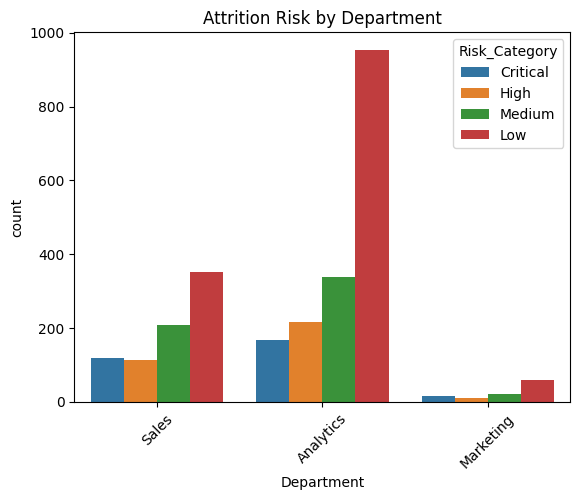

In [61]:
sns.countplot(data=merged, x='Department', hue='Risk_Category')
plt.title('Attrition Risk by Department')
plt.xticks(rotation=45)
plt.show()

In [62]:
critical = merged[merged['Risk_Category'] == 'Critical'].sort_values('SalaryHikelastYear')
print("\nTop 10 Lowest Salary Hike Critical Risks:\n", critical[['EmployeeID', 'SalaryHikelastYear', 'Attrition_Probability']].head(10))


Top 10 Lowest Salary Hike Critical Risks:
      EmployeeID  SalaryHikelastYear  Attrition_Probability
159     6110850                16.0               0.876260
27      6111570                16.0               0.961766
137     6110639                16.0               0.890921
134     6112231                16.0               0.891938
188     6110419                16.0               0.863219
38      6111335                16.0               0.950108
283     6111115                16.0               0.821272
222     6110250                16.0               0.848681
25      6110933                16.0               0.963142
274     6111895                16.0               0.824249


In [63]:
# Summary stats
summary = output_df['Risk_Category'].value_counts(normalize=True) * 100
print("Risk Distribution (%):\n", summary)

Risk Distribution (%):
 Risk_Category
Low         52.281369
Medium      21.901141
High        13.231939
Critical    12.585551
Name: proportion, dtype: float64


In [64]:
# Export report
report_df = output_df.groupby('Risk_Category').agg({
    'EmployeeID': 'count',
    'Attrition_Probability': ['mean', 'min', 'max']
}).round(2)
report_df.to_csv('attrition_risk_summary.csv')
print(report_df)

              EmployeeID Attrition_Probability            
                   count                  mean   min   max
Risk_Category                                             
Critical             331                  0.88  0.80  0.98
High                 348                  0.71  0.60  0.80
Low                 1375                  0.16  0.03  0.30
Medium               576                  0.42  0.30  0.60


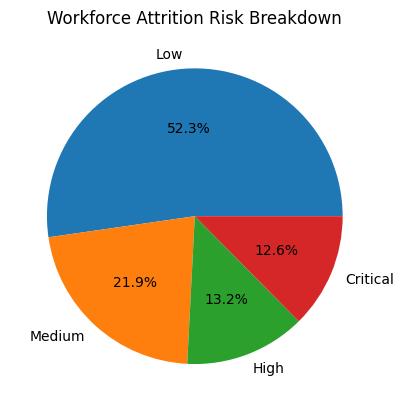

In [65]:
# Quick pie chart
plt.pie(summary.values, labels=summary.index, autopct='%1.1f%%')
plt.title('Workforce Attrition Risk Breakdown')
plt.savefig('risk_pie_chart.png')  # For PPT/email
plt.show()